# QFeq-Mux Analysis

Started by Andrew on 10.5.2020

## Intro

New to Colab iPython notebooks? Learn about [markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0),and [other general knowledge](https://colab.research.google.com/notebooks/basic_features_overview.ipynb#scrollTo=KR921S_OQSHG).

Note that keyboard shortcuts are differnt from vanilla jupyter notebooks. Select Tools->Keyboard Shortcuts at the top to take a look.

## Prereqs


### Meyer - Scott

[Meyer - Scott review paper](https://aip.scitation.org/doi/pdf/10.1063/5.0003320)

### Christ and Silberhorn

[Christ and Silberhorn paper](https://journals.aps.org/pra/pdf/10.1103/PhysRevA.85.023829)

## Analysis

### Constructing the POVMs

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math, Latex
%matplotlib inline
from sympy import symbols, solve, Float

Consider the **Binomial** POVM:
$$\hat{\Pi}_{\text {"Click"}} = \sum_{n=0}^{\infty}\left[1-(1-\eta)^{n}\right]|n\rangle\langle n|$$

This is how it changes the fock state ampltidues of the heralded quantum state

 (80% herald detector loss/efficeincy):

In [ ]:
def PPa(fock,eta):
  return (1 - (1 - eta)**fock)

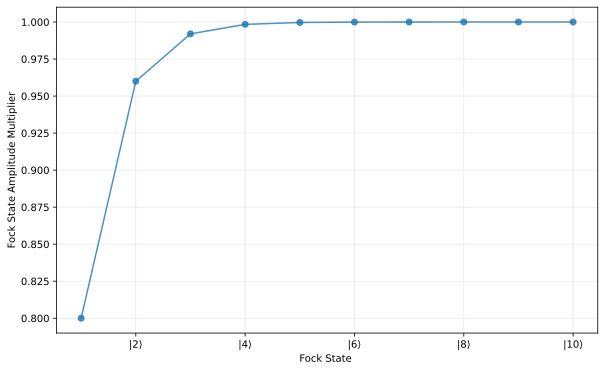

In [ ]:

#import matplotlib.pyplot as plt
#from IPython.display import set_matplotlib_formats
#%matplotlib inline
#set_matplotlib_formats('svg') # without this plots always look blurry from bad scaling or antiailiasing
%config InlineBackend.figure_formats = ['svg']

#import matplotlib as mpl
#mpl.rcParams['figure.dpi']= 72
x = [i for i in range(1,11)]
s = 6
y = [PPa(x_item,0.8) for x_item in x]
fig = plt.figure(figsize = (s*1.618,s))
plt.plot(x,y,marker='o', alpha = 0.8)
plt.ylabel("Fock State Amplitude Multiplier")
plt.xlabel("Fock State ")
plt.xticks([2, 4, 6, 8, 10], [r'$\left|2\right\rangle$',
                          r'$\left|4\right\rangle$',
                          r'$\left|6\right\rangle$',
                          r'$\left|8\right\rangle$',
                          r'$\left|10\right\rangle$'])
plt.grid(alpha = 0.3)
plt.show()


Consider the **PNR** POVM as written in Chirst and Silberhorn:

$$\hat{\Pi}(n)=\sum_{N=n}^{\infty}\binom{N}{n}(1-\eta)^{N-n} \eta^{n}|N\rangle\langle N|$$

IMHO the use of N for the fock state is misleading, compared with the other equations like the binary POVM above.

This makes more sense to me:

$$\hat{\Pi}(i)=\sum_{n=i}^{\infty}\binom{n}{i}(1-\eta)^{n-i} \eta^{i}|n\rangle\langle n|$$

Where $i$ is the number of photons the PNR detector detects.



Make some graphs to show how it changes the fock state ampltidues of the heralded quantum state:

In [ ]:
def binom(n, k):
    if n < k:
      return 0
    else:
      return math.factorial(n) // math.factorial(k) // math.factorial(n - k)

def PPi(d,fock,eta):
  return binom(fock,d)*((1-eta)**(fock - d))*(eta**d)

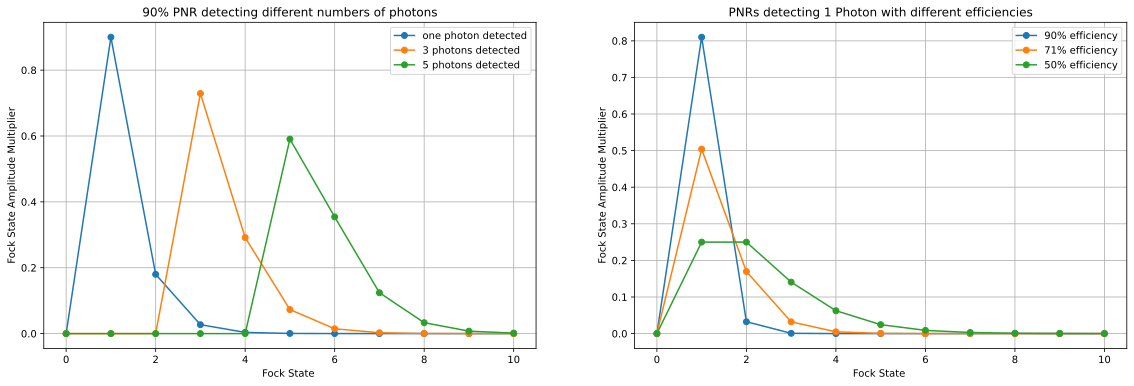

In [ ]:
x = [i for i in range(0,11)]
y1 = [PPi(1, x_item,0.90) for x_item in x]
y3 = [PPi(3, x_item,0.90) for x_item in x]
y5 = [PPi(5, x_item,0.90) for x_item in x]

y1_90 = [PPi(1, x_item,0.90)*PPi(1, x_item,0.90) for x_item in x]
y1_80 = [PPi(1, x_item,0.71)*PPi(1, x_item,0.71) for x_item in x]
y1_50 = [PPi(1, x_item,0.50)*PPi(1, x_item,0.50) for x_item in x]


fig, axs = plt.subplots(1, 2,figsize = (s*2*1.618,s))
#fig = plt.figure(figsize = (s*1.618,s))
axs[0].plot(x,y1,marker='o', label = "one photon detected")
axs[0].plot(x,y3,marker='o', label = "3 photons detected")
axs[0].plot(x,y5,marker='o', label = "5 photons detected")
axs[0].legend()
axs[0].set_ylabel("Fock State Amplitude Multiplier")
axs[0].set_xlabel("Fock State ")
axs[0].set_title("90% PNR detecting different numbers of photons")
axs[0].grid()

axs[1].plot(x,y1_90,marker='o', label = "90% efficiency")
axs[1].plot(x,y1_80,marker='o', label = "71% efficiency")#
axs[1].plot(x,y1_50,marker='o', label = "50% efficiency")
axs[1].legend()
axs[1].set_ylabel("Fock State Amplitude Multiplier")
axs[1].set_xlabel("Fock State ")
axs[1].set_title("PNRs detecting 1 Photon with different efficiencies")
'''
axs[0].set_xticks([2, 4, 6, 8, 10], [r'$\left|2\right\rangle$',
                          r'$\left|4\right\rangle$',
                          r'$\left|6\right\rangle$',
                          r'$\left|8\right\rangle$',
                          r'$\left|10\right\rangle$'])
'''
axs[1].grid()


#plt.show()

The left plot above shows how the detection of different numbers of photons in the idler output of the SPDC changes your expectation of what fock state will come out of the signal arm. Of course, this is for an ideal PNR detector that can differentiate any fock state perfectly. Our current batch of PNR SNSPDs only well differentiate 1 photon detection from two or more. The left plot shows how the information about what fock state the SPDC generated originally degrades with lower herald efficiency. With high efficiency, the detection of a single photon gives you high certainly that the SPDC generated a single pair. With low efficiency, the detection of (what looks like) a single photon doesn't do much to tell you if the SPDC generated a single pair or double pair (green line). It only starts to rule out triple pairs, quadruple pairs, etc.

Note: the probabilities of generating the different number of fock states by the SPDC is not included in these plots above. I'm only looking at how the probabilities of the different fock state pairs *updates* in response other POVM of a herald detection.

### Constructing SPDC Herald probabilities

The Christ and Silberhorn paper uses $\operatorname{sech}(r)$ and $\tanh(r)$ for expressing the output of the SPDC. THe Meyer-Scott review paper uses $\lambda$ and $\sqrt{1 - \lambda^2}$ instead. I will use $\lambda$. Conversion is: $ \tanh(r) = \lambda $, and $ \operatorname{sech}(r) = \sqrt{1 - \lambda^2} $

Equation (6) in C&S:

$$p\left(r, c_{n}\right)=\operatorname{_{PDC}}\left\langle\psi\left|\hat{\Pi}_{c_{n}}\right| \psi\right\rangle_{\mathrm{PDC}}$$


$$=\operatorname{sech}^{2}(r) \sum_{n=0}^{\infty} c_n \tanh ^{2 n}(r)$$

$$ = (1 - \lambda^2) \sum_{n=0}^{\infty} c_n \lambda^{2n} $$

where $c_n$ comes from the POVMs above.

Binary option:$c_{n,binary} =  \left[1-(1-\eta)^{n}\right]$

PNR option: $c_{n,PNR} = \binom{n}{i}(1-\eta)^{n-i} \eta^{i} $

Writing the probability in terms of these $c_n$ is a little confusing for the PNR case though, because then $c_{n,PNR}$ is also a function of $i$. Just keep in mind $c_{n,PNR} = 0$ when $n < i$


Construct the probabilities for heralding:

(1) 1 or more photons with a binary detector:

$$p_{binary}\left(\lambda, \eta\right) = (1 - \lambda^2) \sum_{n=0}^{\infty} \lambda^{2n} \left[1-(1-\eta)^{n}\right]  $$

> There is a closed form expression for this:

$$p_{binary}\left(\lambda, \eta\right) = \frac{\lambda ^2 \eta }{\lambda ^2 (\eta -1)+1}$$


(2) A **single** photon with a PNR detector:

$$p_{PNR}\left(i, \lambda, \eta\right) = (1 - \lambda^2) \sum_{n=i}^{\infty} \lambda^{2n} \binom{n}{i}(1-\eta)^{n-i} \eta^{i}  $$

> There isn't a nice closed form expression for this, but there is for when $i$ is set to 1 (Found with mathematica).

$$p_{PNR}\left(1, \lambda, \eta\right) = (1 - \lambda^2) \sum_{n=1}^{\infty} \lambda^{2n} \binom{n}{1}(1-\eta)^{n-1} \eta  = -\frac{\lambda ^2 \left(\lambda ^2-1\right) \eta }{\left(\lambda ^2 (\eta -1)+1\right)^2} $$

>*Futher work in this cell is more 'expiremental'*. It is only relevant to a special dispersion-mediated time-of-flight spectrometer idea we had.

There is also the probability of heralding 2 photons, or more. You don't need these explicitely for the kind of analysis done in C&S, but I think you need to have an estimate of the probability of heralding 2 or more photons, because this is the probability of time that the scanning spectral multiplexing method *knowingly fails*. Sometimes the PNR detector detects more than 1 photon in a spectral bin and because of the dead time of the detector it can't look at any of the following bines.

So the following work be used later on in this document when we get to multiplexing.

$$p_{PNR}\left(2, \lambda, \eta\right) = \sqrt{1 - \lambda^2} \sum_{n=2}^{\infty} \lambda^{2n} \binom{n}{2}(1-\eta)^{n-2} \eta^2  = -\frac{\lambda ^4 \left(\lambda ^2-1\right) \eta ^2}{\left(\lambda ^2 (\eta -1)+1\right)^3} $$

$$p_{PNR}\left(3, \lambda, \eta\right) = \sqrt{1 - \lambda^2} \sum_{n=3}^{\infty} \lambda^{2n} \binom{n}{3}(1-\eta)^{n-3} \eta^3  = -\frac{\lambda ^6 \left(\lambda ^2-1\right) \eta ^3}{\left(\lambda ^2 (\eta -1)+1\right)^4} $$

$$etc...$$

We start to see a pattern.

$$p_{PNR}\left(i, \lambda, \eta\right) = \sqrt{1 - \lambda^2} \sum_{n=i}^{\infty} \lambda^{2n} \binom{n}{i}(1-\eta)^{n-i} \eta^i  = -\frac{\lambda ^{2i} \left(\lambda ^2-1\right) \eta ^i}{\left(\lambda ^2 (\eta -1)+1\right)^{i+1}} $$

>*Would be great if somone could check my work!*

Now construct a sum that represents the probability of heralding anything more than vacuum or a single pair. I used mathematica simplify[] again.

$$p_{PNR fail}\left(\lambda, \eta\right) = \sum_{i = 2}^{\infty}-\frac{\lambda ^{2i} \left(\lambda ^2-1\right) \eta ^i}{\left(\lambda ^2 (\eta -1)+1\right)^{i+1}} = \frac{\lambda ^4 \eta ^2}{\left(\lambda ^2 (\eta -1)+1\right)^2}$$


write this into code for use later. Name it failPNR()


In [ ]:
def pBinary(lamb, eta):    # don't use lambda as a variable. It's a protected term in python
  return (lamb**2)*eta/((lamb**2)*(eta - 1) + 1)

def pPNR(lamb, eta):
  return -eta*(lamb**2)*((lamb**2) - 1)/((1 + (eta - 1)*(lamb**2))**2)

def failPNR(lamb, eta): #single PNR detector detects 2 or more photons
  return (lamb**4)*(eta**2)/(((lamb**2)*(eta - 1) + 1)**2)

The scanning method has some probability of encountering a spectral bin with one photon first, and another probability of encountering one with two or more photons first. We can define a success factor that quantifies how often it encounters a single photon first. It is near 1 when pump power is low and the spectral bins are dominated by vacume and single photon states. It goes to zero for high pump power when the SPDC is making many double pairs.


The success factor does not take into account when the heralding fails because no photons were detected in any frequency bins. That's handled by the *heralding probability* $p_{PNR} $ above (and its multiplexed counterpart below).

In [ ]:
def success_factor(lamb,eta):
   return pPNR(lamb,eta)/(failPNR(lamb,eta)+pPNR(lamb,eta))

In [ ]:
success_factor(.001,0.8)

0.99999919999984

### Herald fidelities

Now for the fidelities, equation (8) from C & S. Remember, PPi(1,1,eta) corresponds to when you detect 1 photon with the PNR detector, and that herald was caused by a single SPDC pair.

$$F=\left\langle 1\left|\rho_{s}\right| 1\right\rangle=\frac{c_{1} \tanh ^{2}(r)}{\sum_{n=0}^{\infty} c_{n} \tanh ^{2 n}(r)} =\frac{c_{1} \lambda ^{2}}{\sum_{n=0}^{\infty} c_{n} \lambda ^{2 n}}$$

These end up quite simple for the PNR and binary POVM options. All the simplifications were just done with Simplify[] in Mathematica.

The binary fidelity:

$$F_{binary}\left(\lambda, c_{n}\right)= \frac{\eta \lambda ^{2}}{\sum_{n=0}^{\infty} c_{n,binary} \lambda ^{2 n}}$$
$$F_{binary}\left(\lambda, \eta\right) =\frac{\eta \lambda ^{2}}{\sum_{n=0}^{\infty}  (1-(1-\eta)^{n})\lambda ^{2 n}}  = -\left(\lambda ^2-1\right) \left(\lambda ^2 (\eta -1)+1\right)$$

And the PNR fidelity:

$$F_{PNR}\left(\lambda, c_{n}\right)= \frac{\eta \lambda ^{2}}{\sum_{n=0}^{\infty} c_{n,PNR} \lambda ^{2 n}}$$

$$F_{PNR}\left(\lambda, \eta\right)=\frac{\eta \lambda ^{2}}{\sum_{n=1}^{\infty}  \binom{n}{1}(1-\eta)^{n-1} \eta\lambda ^{2 n}}  = \left(\lambda ^2 (\eta -1)+1\right)^2$$



In [ ]:
def fBinary(lamb,eta):
  return -(lamb**2 - 1)*((lamb**2)*(eta - 1) + 1)

def fPNR(lamb,eta):
  return ((lamb**2)*(eta - 1) + 1)**2

Make some graphs like in the C&S paper. Need some lists of probabilities and fidelities over a range of squeezing factors $\lambda$. Make lists for both detector types, and for 95%, 80%, 30% and 10% detector efficiencies

*Keep in mind efficiency in this case takes into account any and all loss between the initial generation point of an SPDC pair and where one member of the pair is detected (in the SNSPD). It's not just the efficeincy of the detecor*

*An 80% efficient SNSPD isn't uncommon. But 80% efficient coupling of an SPDC crystal to an SNSPD is challenging.*

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_formats = ['svg']
s = 6

def fPNR(lamb,eta):
  return ((lamb**2)*(eta - 1) + 1)**2

def pPNR(lamb, eta):
  return -eta*(lamb**2)*((lamb**2) - 1)/((1 + (eta - 1)*(lamb**2))**2)

lambdas = [i/200 for i in range(201)]

pPNR_99 = [pPNR(lamb,0.99) for lamb in lambdas]
fPNR_99 = [fPNR(lamb,0.99) for lamb in lambdas]
pPNR_80 = [pPNR(lamb,0.8) for lamb in lambdas]
fPNR_80 = [fPNR(lamb,0.8) for lamb in lambdas]
pPNR_30 = [pPNR(lamb,0.3) for lamb in lambdas]
fPNR_30 = [fPNR(lamb,0.3) for lamb in lambdas]
pPNR_10 = [pPNR(lamb,0.1) for lamb in lambdas]
fPNR_10 = [fPNR(lamb,0.1) for lamb in lambdas]

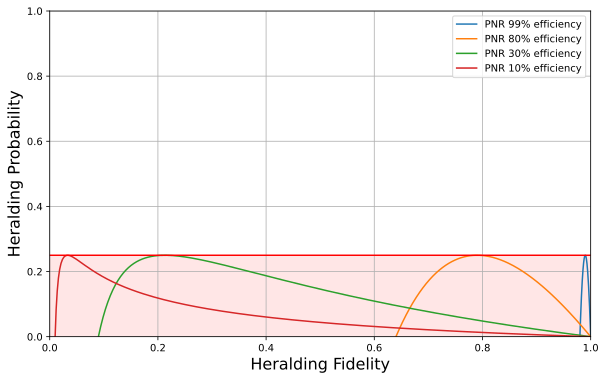

In [ ]:
fig = plt.figure(figsize = (s*1.618,s))
plt.plot(fPNR_99,pPNR_99, label = "PNR 99% efficiency")
plt.plot(fPNR_80,pPNR_80, label = "PNR 80% efficiency")
plt.plot(fPNR_30,pPNR_30, label = "PNR 30% efficiency")
plt.plot(fPNR_10,pPNR_10, label = "PNR 10% efficiency")
plt.axhline(y = 0.25, color = 'red')
plt.axhspan(0,0.25, alpha = 0.1, color = 'red')
plt.legend()
plt.ylabel("Heralding Probability", fontsize = 16)
plt.xlabel("Heralding Fidelity", fontsize = 16)
plt.ylim(0,1)
plt.xlim(0,1)
plt.grid()
plt.show()

In [ ]:
lambdas = [i/100 for i in range(101)]

pBinary_95 = [pBinary(lamb,0.95) for lamb in lambdas]
fBinary_95 = [fBinary(lamb,0.95) for lamb in lambdas]

pBinary_80 = [pBinary(lamb,0.8) for lamb in lambdas]
fBinary_80 = [fBinary(lamb,0.8) for lamb in lambdas]

pBinary_30 = [pBinary(lamb,0.3) for lamb in lambdas]
fBinary_30 = [fBinary(lamb,0.3) for lamb in lambdas]

pBinary_10 = [pBinary(lamb,0.1) for lamb in lambdas]
fBinary_10 = [fBinary(lamb,0.1) for lamb in lambdas]

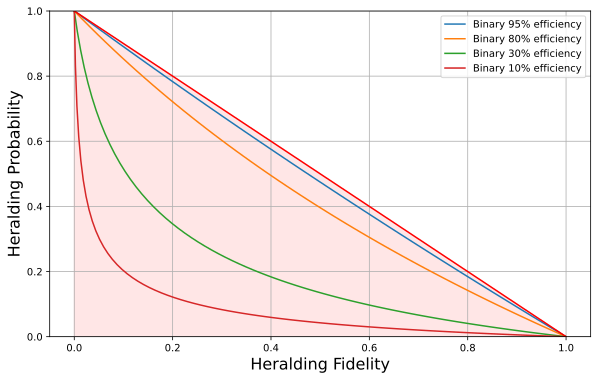

In [ ]:
fig = plt.figure(figsize = (s*1.618,s))

plt.plot(fBinary_95,pBinary_95, label = "Binary 95% efficiency")
plt.plot(fBinary_80,pBinary_80, label = "Binary 80% efficiency")
plt.plot(fBinary_30,pBinary_30, label = "Binary 30% efficiency")
plt.plot(fBinary_10,pBinary_10, label = "Binary 10% efficiency")
plt.plot([0,1],[1,0],color = 'red')
plt.fill_between([0,1],[1,0],0, alpha = 0.1, color = 'red')
plt.legend()
plt.ylabel("Heralding Probability", fontsize = 16)
plt.xlabel("Heralding Fidelity", fontsize = 16)
plt.ylim(0,1)
plt.grid()
plt.show()

The Meyer-Scott review paper calculates for a fildeity of 0.99, you need $\lambda^2 = 0.0083$. Let's verify that.

use the sympy.solve library to do a zero-crossing numerical solve.

In [ ]:
lambd = symbols('lambd')
expr = fBinary(lambd,0.8) - 0.99
possible_lambdas = solve(expr)

In [ ]:
possible_lambdas

[-2.44778574641048, -0.0913506413205828, 0.0913506413205828, 2.44778574641048]

In [ ]:
possible_lambdas[2]**2

0.00834493966968177

One of the x-intercepts is $\lambda$ where $\lambda^2 = 0.0083$

### Multiplexing

Meyer-Scott goes onto calculate the number of modes needed to reach a 99% fidelity probability with that $\lambda$, and finds you need 692.

That amounts to solving the following for m (this is essentially equation (12) in Meyer-Scott):

$$ 1 - \Big(1 - p_{binary}(\lambda = 0.09135, \eta = 0.8)\Big)^m = 0.99 $$





In [ ]:
m = 692
1 - (1 - pBinary(0.09135064,0.800))**m

0.9903714558900593

### The PNR 'dream'

We have this idea that PNR could be super useful for building a single photon source. As long as one of the PNR detectors detected a single photon, you have 1 mode that heralded 'successfully'. The C&S paper shows in an ideal scenario only 17 multiplexed modes are needed to achieve 99% fidelity and generation probability.

So our intuition is attracted to this kind of scenario:

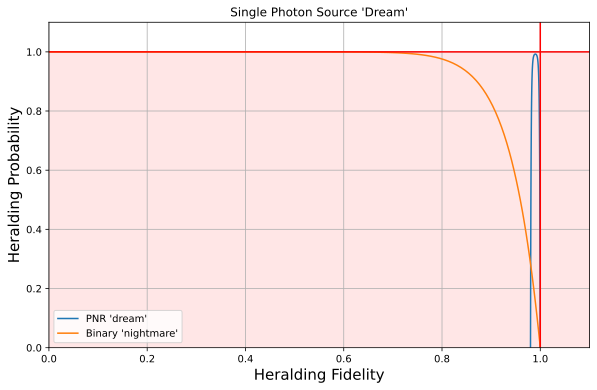

Herald probability at top:  0.9924826237742114
Herald fidelity at top:  0.9899434116810001


In [ ]:
def closest(lst, K):
    return min(range(len(lst)), key=lambda i: abs(lst[i]-K))

lambdas = [i/100 for i in range(101)]
modes = 17
efficiency = 0.99
pPNR_Mux = [1 - (1 - pPNR(lamb,efficiency))**modes for lamb in lambdas]
fPNR_Mux = [fPNR(lamb,efficiency) for lamb in lambdas]

pBinary_Mux = [1 - (1 - pBinary(lamb,efficiency))**modes for lamb in lambdas]
fBinary_Mux = [fBinary(lamb,efficiency) for lamb in lambdas]


fig = plt.figure(figsize = (s*1.618,s))

plt.plot(fPNR_Mux,pPNR_Mux, label = "PNR 'dream'")
plt.plot(fBinary_Mux,pBinary_Mux, label = "Binary 'nightmare'")

plt.axhline(y = 1, color = 'red')
plt.axvline(x = 1, color = 'red')
plt.axhspan(0,1, xmin = 0, xmax = 1, alpha = 0.1, color = 'red')
plt.legend()
plt.ylabel("Heralding Probability", fontsize = 15)
plt.xlabel("Heralding Fidelity", fontsize = 15)
plt.title("Single Photon Source 'Dream'")
plt.ylim(0,1.1)
plt.xlim(0,1.1)
plt.grid()
plt.show()
print("Herald probability at top: ", max(pPNR_Mux))
print("Herald fidelity at top: ", fPNR_Mux[closest(pPNR_Mux,max(pPNR_Mux))])

Of course the problem with the 'dream' scenario where you only need 17 modes to get near 99% herald probability and fidelity is the *heralding efficiency*. 99% efficiency is totally unreasonable.

To make up for a lower heralding efficiency, you have to decrease pump power per mode (follow the line on the graph toward the lower right). This means that with heralding efficiency lower than 98% or so, your objective goes from maximizing the heralding probability for each mode to purposefully lowering it (below the pump power where you herald $|1\rangle$ 25% of the time). You lower it until the herald fidelity reaches an acceptable value.

In this other regime many more modes are needed to get herald probability back up to near 99%.

### More Realistic Scenarios

#### Binary Multiplexing

Start with 30 modes to get an idea of how more realistic heralding efficiencies play a role.

In [ ]:
lambdas = [i/100 for i in range(101)]
modes = 30
pBinary_95_Mux30 = [1 - (1 - pBinary(lamb,0.95))**modes for lamb in lambdas]
pBinary_80_Mux30 = [1 - (1 - pBinary(lamb,0.8))**modes for lamb in lambdas]
pBinary_30_Mux30 = [1 - (1 - pBinary(lamb,0.30))**modes for lamb in lambdas]
pBinary_10_Mux30 = [1 - (1 - pBinary(lamb,0.10))**modes for lamb in lambdas]

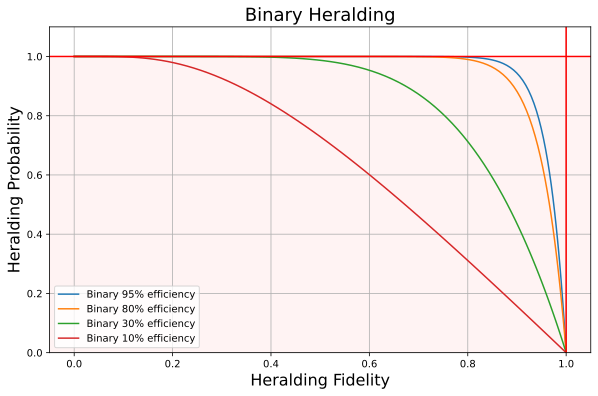

In [ ]:
fig = plt.figure(figsize = (s*1.618,s))

plt.plot(fBinary_95,pBinary_95_Mux30, label = "Binary 95% efficiency")
plt.plot(fBinary_80,pBinary_80_Mux30, label = "Binary 80% efficiency")
plt.plot(fBinary_30,pBinary_30_Mux30, label = "Binary 30% efficiency")
plt.plot(fBinary_10,pBinary_10_Mux30, label = "Binary 10% efficiency")
plt.axhline(y = 1, color = 'red')
plt.axvline(x = 1, color = 'red')
plt.axhspan(0,1, xmin = 0, xmax = 1, alpha = 0.05, color = 'red')
plt.legend()
plt.ylabel("Heralding Probability", fontsize = 16)
plt.xlabel("Heralding Fidelity", fontsize = 16)
plt.title('Binary Heralding', fontsize = 18)
plt.ylim(0,1.1)
plt.grid()
plt.show()

#### PNR Multiplexing

Make a figure like the one above for PNR fidelity vs probability, but now with 30 multiplexed modes.

In [ ]:
lambdas = [i/200 for i in range(1,201)]
modes = 30
pPNR_95_Mux30 = [1 - (1 - pPNR(lamb,0.95))**modes for lamb in lambdas]
pPNR_80_Mux30 = [1 - (1 - pPNR(lamb,0.80))**modes for lamb in lambdas]
pPNR_30_Mux30 = [1 - (1 - pPNR(lamb,0.30))**modes for lamb in lambdas]
pPNR_10_Mux30 = [1 - (1 - pPNR(lamb,0.10))**modes for lamb in lambdas]

pPNR_95_Mux30_f = [1 - (1 - success_factor(lamb,0.95)*pPNR(lamb,0.95))**modes for lamb in lambdas]
pPNR_80_Mux30_f = [1 - (1 - success_factor(lamb,0.80)*pPNR(lamb,0.80))**modes for lamb in lambdas]
pPNR_30_Mux30_f = [1 - (1 - success_factor(lamb,0.30)*pPNR(lamb,0.30))**modes for lamb in lambdas]
pPNR_10_Mux30_f = [1 - (1 - success_factor(lamb,0.10)*pPNR(lamb,0.10))**modes for lamb in lambdas]

# these are the same as above but they're easier to play around with here
fPNR_95 = [fPNR(lamb,0.95) for lamb in lambdas]
fPNR_80 = [fPNR(lamb,0.80) for lamb in lambdas]
fPNR_30 = [fPNR(lamb,0.30) for lamb in lambdas]
fPNR_10 = [fPNR(lamb,0.10) for lamb in lambdas]

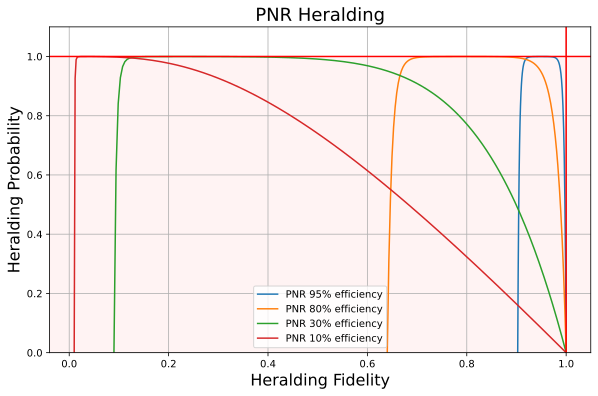

In [ ]:
fig = plt.figure(figsize = (s*1.618,s))

plt.plot(fPNR_95,pPNR_95_Mux30, label = "PNR 95% efficiency")
plt.plot(fPNR_80,pPNR_80_Mux30, label = "PNR 80% efficiency")
plt.plot(fPNR_30,pPNR_30_Mux30, label = "PNR 30% efficiency")
plt.plot(fPNR_10,pPNR_10_Mux30, label = "PNR 10% efficiency")
plt.axhline(y = 1, color = 'red')
plt.axvline(x = 1, color = 'red')
plt.axhspan(0,1, xmin = 0, xmax = 1, alpha = 0.05, color = 'red')
plt.legend()
plt.ylabel("Heralding Probability", fontsize = 16)
plt.xlabel("Heralding Fidelity", fontsize = 16)
plt.title('PNR Heralding', fontsize = 18)
plt.ylim(0,1.1)
plt.grid()
plt.show()

#### Binary vs PNR

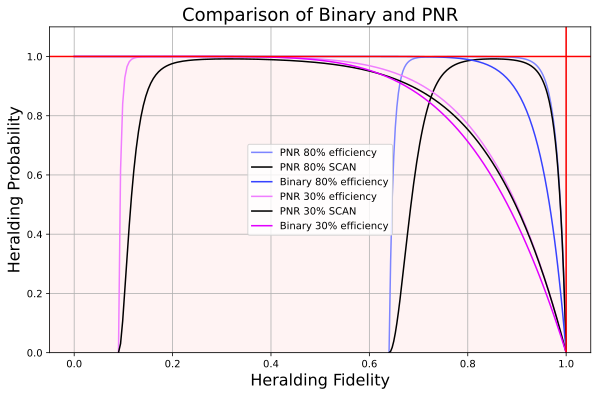

In [ ]:
fig = plt.figure(figsize = (s*1.618,s))


plt.plot(fPNR_80,pPNR_80_Mux30, label = "PNR 80% efficiency", color = '#7d85ff')
plt.plot(fPNR_80,pPNR_80_Mux30_f, label = "PNR 80% SCAN", color = 'black')
plt.plot(fBinary_80,pBinary_80_Mux30, label = "Binary 80% efficiency", color = '#3642ff')

plt.plot(fPNR_30,pPNR_30_Mux30, label = "PNR 30% efficiency", color = '#f07dff')
plt.plot(fPNR_30,pPNR_30_Mux30_f, label = "PNR 30% SCAN", color = 'black')
plt.plot(fBinary_30,pBinary_30_Mux30, label = "Binary 30% efficiency", color = '#e200ff')

plt.axhline(y = 1, color = 'red')
plt.axvline(x = 1, color = 'red')
plt.axhspan(0,1, xmin = 0, xmax = 1, alpha = 0.05, color = 'red')
plt.legend()
plt.ylabel("Heralding Probability", fontsize = 16)
plt.xlabel("Heralding Fidelity", fontsize = 16)
plt.title('Comparison of Binary and PNR', fontsize = 18)
plt.ylim(0,1.1)
plt.grid()
plt.show()

# Conclusions

### Coupling efficiency to the SPDC is very important

#### Especially if you want to get a benefit from PNR detectors. Below 30% coupling efficiency, PNR hardly makes a difference.

But PNR is definitely good to have if you're coupling efficiency is pretty decent. Say, above 70%.

The spectral scanning multiplexing method seems to work fine in comparison with a more conventional method. You set your pump power so that you don't expect many double double pair detections anyways, so detecting one occasionally isn't a large loss to your herald probability.